In [16]:
import preprocessing_main
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X_train = preprocessing_main.X_train
y_train = preprocessing_main.y_train
X_test = preprocessing_main.X_test
y_test = preprocessing_main.y_test


# Cross Validation

In [17]:
def get_roc_curve(y_test,y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def get_confusion_matrix(y_test,y_pred):
    conf_mat = confusion_matrix(y_test,y_pred)
    sns.heatmap(conf_mat, annot=True, linewidth=0.5, xticklabels=["good", "bad"], fmt="g")
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

def cross_val(classf, X_train, y_train,y_test,y_pred):
    scores1 = cross_val_score(classf, X_train, y_train, scoring='accuracy')
    scores2 = cross_val_score(classf, X_train, y_train, scoring='precision')
    scores3 = cross_val_score(classf, X_train, y_train, scoring='roc_auc')
    scores4 = cross_val_score(classf, X_train, y_train, scoring='recall')
    scores5 = cross_val_score(classf, X_train, y_train, scoring='f1')
    
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation Roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std()))
    print("Cross Validation F1-score: %0.2f (+/- %0.2f)" % (scores5.mean(), scores5.std()))
    
    get_confusion_matrix(y_test,y_pred)
    get_roc_curve(y_test,y_pred)

    

# Decision Tree

In [18]:
def decision_tree(X_train, y_train,X_test, y_test):
    print("Decision Tree Classifier")
    dec_tree = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=5).fit(X_train, y_train)
    
    y_pred = dec_tree.predict(X_test)
    cross_val(dec_tree, X_train, y_train,y_test,y_pred)
    

# Logistic Regression

In [19]:
def logistic_reg(X_train, y_train,X_test, y_test):
    print("Logistic Regression")
    logreg = LogisticRegression().fit(X_train, y_train)

    y_pred = logreg.predict(X_test)
    cross_val(logreg, X_train, y_train,y_test,y_pred)


# Random Forest

In [20]:
def random_forest(X_train, y_train,X_test, y_test):
    print("Random Forest Classifier")
    randomforest = RandomForestClassifier().fit(X_train, y_train)
    
    y_pred = randomforest.predict(X_test)
    cross_val(randomforest, X_train, y_train,y_test,y_pred)

Decision Tree Classifier
Cross Validation Accuracy: 0.67 (+/- 0.03)
Cross Validation Precision: 0.45 (+/- 0.06)
Cross Validation Roc_auc: 0.66 (+/- 0.03)
Cross Validation Recall: 0.43 (+/- 0.07)
Cross Validation F1-score: 0.44 (+/- 0.06)


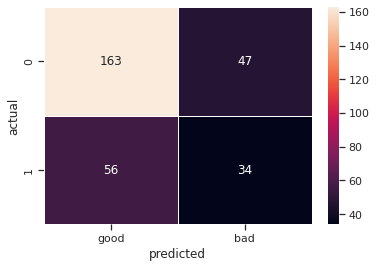

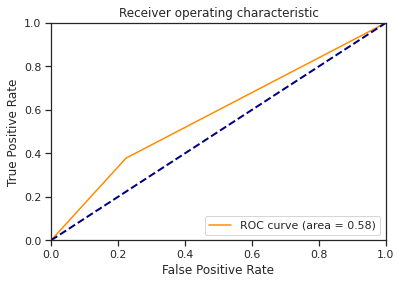



Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Accuracy: 0.72 (+/- 0.02)
Cross Validation Precision: 0.55 (+/- 0.05)
Cross Validation Roc_auc: 0.77 (+/- 0.04)
Cross Validation Recall: 0.41 (+/- 0.08)
Cross Validation F1-score: 0.47 (+/- 0.06)


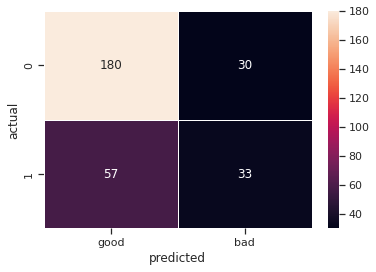

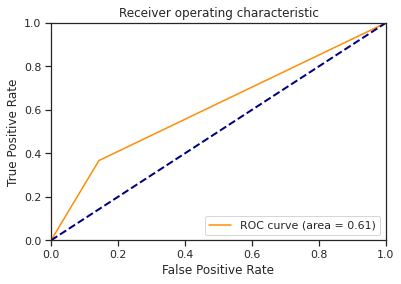



Random Forest Classifier
Cross Validation Accuracy: 0.74 (+/- 0.02)
Cross Validation Precision: 0.63 (+/- 0.14)
Cross Validation Roc_auc: 0.77 (+/- 0.04)
Cross Validation Recall: 0.35 (+/- 0.09)
Cross Validation F1-score: 0.42 (+/- 0.07)


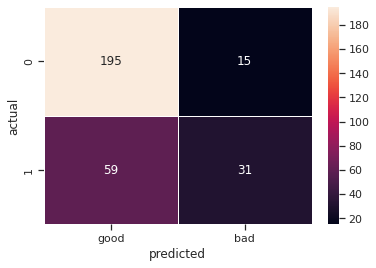

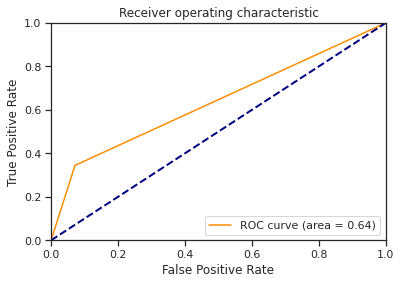

In [21]:
decision_tree(X_train,y_train, X_test, y_test)
print("\n")
logistic_reg(X_train,y_train,X_test, y_test)
print("\n")
random_forest(X_train,y_train,X_test, y_test)
